#Handwritten Character Recognition using CNN
using MNIST Dataset


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
objects=tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels)=objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


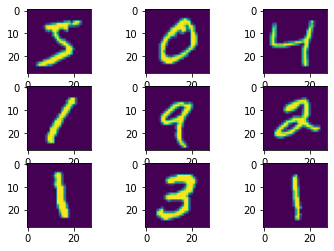

In [3]:
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)
  #plot raw pixel data
  plt.imshow(training_images[i])

In [4]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

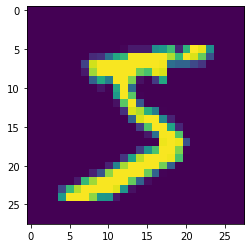

In [5]:
plt.imshow(training_images[0])

Normalize the data now for the pixel values to lie in the range [0,1]. This makes the training process very fast. Easier for the neural network to learn from the data

In [6]:
training_images=training_images/255.0
test_images=test_images/255.0

Let us start training the network now. 

We first create a layer of networks in sequenceand inside the function Sequential, we have defined each individual layer.

Since we know that each image is 28X28, we need those many neurons in the first layer. We are actually converting a 2-D image into a 1-D array to give it to one row of input neurons.

The next layer is a fully connected neural network (with 128 input neurons) with activation function as ReLu
The next layer is a fully connected neural network with activation function softmax

Number of output units will be 10, as there are ten digits to be recognised.



In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

After training the neural network, we have t assign it some parameters viz., the optimisation function and loss function
Here, we are using Adam Optimiser which is a modified version of Gradient Descent Algorithm. 
Cross Entropy is used for measuring the loss
Metrics for classifier evaluations: Accuracy


In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

The Model construction is now done. Now to train the model, we use the function 'fit'





In [9]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4370 - accuracy: 0.8743
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9887


Do not be fooled by the high accuracy, as this is only training accuracy


In [10]:
print(model.evaluate(test_images,test_labels))


313/313 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9767
[0.075838103890419, 0.9767000079154968]


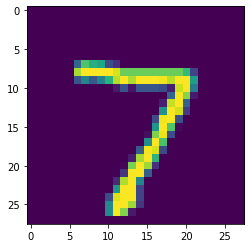

In [11]:
#Just for cross checking
plt.imshow(test_images[0])


In [12]:
prediction=model.predict(test_images)
print(np.argmax(prediction[0]))

7
